In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# 0. General note

* This notebook produces figures and calculations presented in [Ye et al. 2017, JGR](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2016JB013811).

* This notebook compares widely used Pt, Au, and MgO scales at 300 K and high temperatures.

# 1. Global setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from uncertainties import unumpy as unp
import pytheos as eos

# 2. Data Input

Notations for datasets.

* PM = Pt-MgO
* AM = Au-MgO

## 2.1. Reading Pt-MgO-Ne (PMN) and Au-MgO-Ne (AMN) at 300 K

In [3]:
data_PMN_300 = pd.read_csv('./data/Pt_MgO_Ne_300K.csv')
data_AMN_300 = pd.read_csv('./data/Au_MgO_Ne_300K.csv')

In [12]:
data_PMN_300.tail()

,V(Pt),sV(Pt),V(MgO),sV(MgO),V(Ne),sV(Ne)
34,49.61000,0.04565,55.22115,0.05116,2.67450000e+01,1.00000000e-02
35,49.20000,0.06383,54.56486,0.06285,2.63920000e+01,1.70000000e-02
36,48.34850,0.02516,53.13423,0.02864,2.54410000e+01,1.75000000e-01
37,48.01207,0.04801,52.52936,0.07583,2.50460000e+01,1.51000000e-01
38,47.17246,0.03782,51.27719,0.04821,2.42020000e+01,1.11000000e-01


In [13]:
data_AMN_300.tail()

,V(Au),sV(Au),V(MgO),sV(MgO),V(Ne),sV(Ne)
23,50.67987,0.05208,52.85719,0.01882,2.52670000e+01,8.70000000e-02
24,50.52674,0.05184,52.68247,0.06227,2.50990000e+01,9.80000000e-02
25,50.43685,0.05333,52.56716,0.04897,2.50370000e+01,5.30000000e-02
26,50.38000,0.05629,52.36025,0.02876,2.49100000e+01,5.50000000e-02
27,50.05099,0.05267,51.95525,0.01051,2.46550000e+01,7.50000000e-02


In [8]:
v_Pt_PMN    = data_PMN_300['V(Pt)'] 
s_v_Pt_PMN  = data_PMN_300['sV(Pt)']
v_MgO_PMN   = data_PMN_300['V(MgO)'] 
s_v_MgO_PMN = data_PMN_300['sV(MgO)']
v_Ne_PMN    = data_PMN_300['V(Ne)'] 
s_v_Ne_PMN  = data_PMN_300['sV(Ne)']

v_Au_AMN    = data_AMN_300['V(Au)'] 
s_v_Au_AMN  = data_AMN_300['sV(Au)']
v_MgO_AMN   = data_AMN_300['V(MgO)'] 
s_v_MgO_AMN = data_AMN_300['sV(MgO)']
v_Ne_AMN    = data_AMN_300['V(Ne)'] 
s_v_Ne_AMN  = data_AMN_300['sV(Ne)']

## 2.2. Define Pt, Au, and MgO scales

In [5]:
std_MgO =[ eos.periclase.Speziale2001(), eos.periclase.Dorogokupets2007(), \
             eos.periclase.Tange2009(), eos.periclase.Dorogokupets2015()]
std_Au =[ eos.gold.Fei2007bm3(), eos.gold.Dorogokupets2007(), \
             eos.gold.Yokoo2009(), eos.gold.Dorogokupets2015()]
std_Pt =[ eos.platinum.Fei2007bm3(), eos.platinum.Dorogokupets2007(), \
             eos.platinum.Yokoo2009(), eos.platinum.Dorogokupets2015()]

# 3. Comparing scales

In [6]:
p_MgO_PMN = []; p_MgO_AMN = []; p_Pt_PMN = []; p_Au_AMN = [] 
for i in range(4):
    p_MgO_PMN_t = std_MgO[i].cal_p(unp.uarray(v_MgO_PMN, s_v_MgO_PMN), 300.*np.ones(v_Pt_PMN.size))
    p_MgO_AMN_t = std_MgO[i].cal_p(unp.uarray(v_MgO_AMN, s_v_MgO_AMN), 300.*np.ones(v_Au_AMN.size))
    p_Pt_PMN_t = std_Pt[i].cal_p(unp.uarray(v_Pt_PMN, s_v_Pt_PMN), 300.*np.ones(v_Pt_PMN.size))
    p_Au_AMN_t = std_Au[i].cal_p(unp.uarray(v_Au_AMN, s_v_Au_AMN), 300.*np.ones(v_Au_AMN.size))
    p_MgO_PMN.append(p_MgO_PMN_t)
    p_MgO_AMN.append(p_MgO_AMN_t)
    p_Pt_PMN.append(p_Pt_PMN_t)
    p_Au_AMN.append(p_Au_AMN_t)

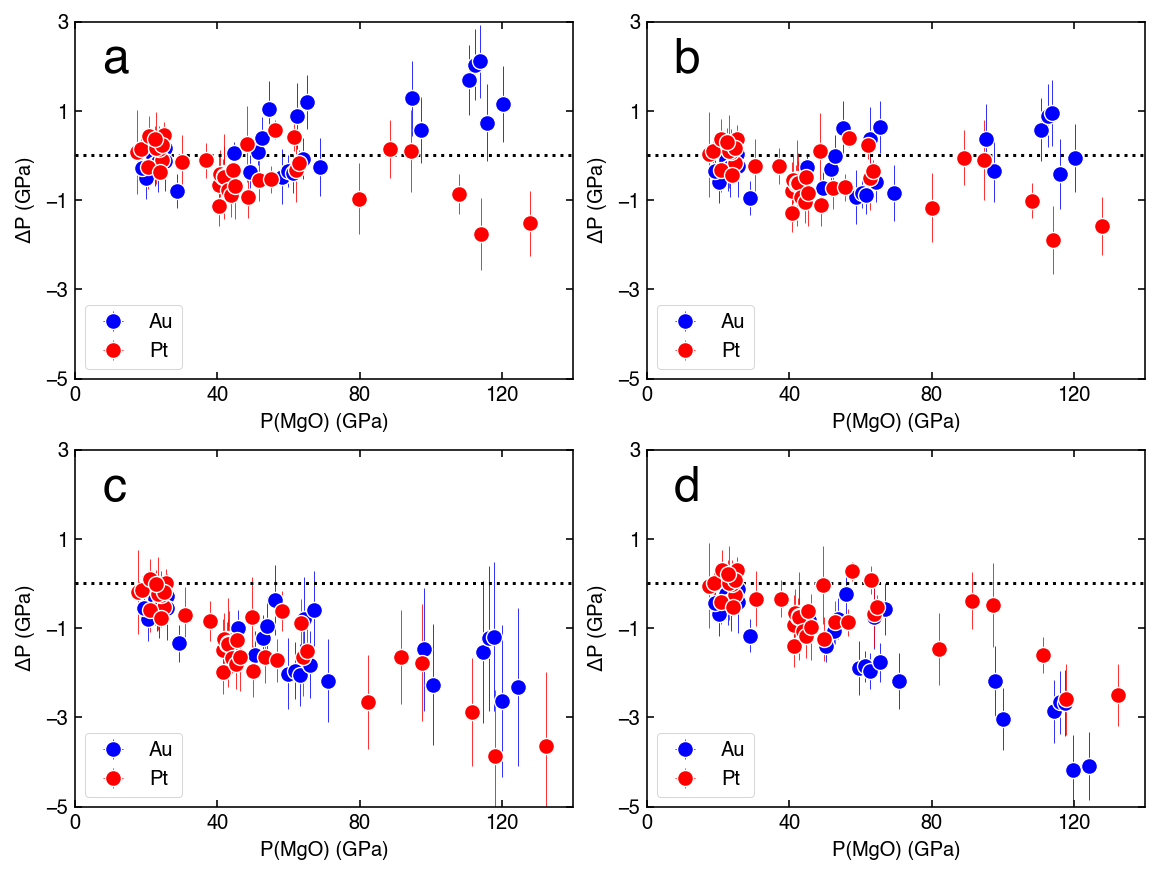

In [7]:
f, axarr = plt.subplots(2, 2, \
                    figsize=(8,6))
ax = [axarr[0,0], axarr[0,1], axarr[1,0], axarr[1,1]]
ms = 8; mew = 0.7
label = ['a', 'b', 'c', 'd']

for i in range(4):
    ax[i].axhline(y=0, c='k', ls=':')
    ax[i].errorbar(unp.nominal_values(p_MgO_AMN[i]), \
            unp.nominal_values(p_Au_AMN[i]) - unp.nominal_values(p_MgO_AMN[i]), \
            xerr = unp.std_devs(p_MgO_AMN[i]),\
            yerr = unp.std_devs(p_Au_AMN[i]),\
            fmt='bo', mec='w', mew=mew, label = 'Au', \
            ms=ms, capsize=0, lw=0.4)
    ax[i].errorbar(unp.nominal_values(p_MgO_PMN[i]), \
            unp.nominal_values(p_Pt_PMN[i]) - unp.nominal_values(p_MgO_PMN[i]), \
            xerr = unp.std_devs(p_MgO_PMN[i]),\
            yerr = unp.std_devs(p_Pt_PMN[i]), \
            fmt='ro', mec='w', mew=mew, label="Pt", \
            ms=ms, capsize=0, lw=0.4)
    ax[i].set_xlabel('P(MgO) (GPa)'); ax[i].set_ylabel('$\mathdefault{{\Delta} P}$ (GPa)')
    l = ax[i].legend(loc=3, numpoints = 1, fontsize = 10)
    l.get_frame().set_linewidth(0.5)
    plt.tight_layout(pad=0.4)
    ax[i].set_ylim(-5.,3.); ax[i].set_xlim(0.,140.)
    ax[i].set_xticks(ax[i].get_xticks()[::2]); ax[i].set_yticks(ax[i].get_yticks()[::2])
    ax[i].text(0.08, 0.83,label[i], horizontalalignment='center',\
            verticalalignment='bottom', transform = ax[i].transAxes,\
              fontsize = 24)

plt.savefig('f-Compare-300K.pdf', bbox_inches='tight', \
                        pad_inches=0.1)